# Machine Learning Assignment (Second Part)
##### Name: Matvey Makhnov<br> 
**Task:** To cluster images of flowers into distinct groups based on their visual features using unsupervised learning techniques. The goal is to utilize a pre-trained convolutional neural network (CNN) to extract features from the images and then apply a clustering algorithm to categorize the flowers.

I'll start with data loading and applying some basic transformation as I made it in the 1st task

In [2]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import DataLoader
from torchvision import transforms, datasets 



transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])


dataset = datasets.ImageFolder(root="Flowers_102_Dataset", transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=False)

Here I'll use model I trained on previous task ` Best_in_transfer_learning_CNN.pt ` 

In [ ]:
import torchvision.models as models
class CustomResNet50(nn.Module):
    def __init__(self, num_classes=102):
        super(CustomResNet50, self).__init__()
        # load pretrained resnet50
        self.resnet = models.resnet50(pretrained=True)
        # replace the last FC layer to output 102
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
    
    def forward(self, x):
        return self.resnet(x)
    
model = CustomResNet50()
model.load_state_dict(torch.load("Best_in_transfer_learning_CNN.pt"), strict=False)

model.eval()

c:\Users\user\Desktop\Innopolis_courses\ML_Innopolis\Assignment_2\Machine_Learning_course\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\Desktop\Innopolis_courses\ML_Innopolis\Assignment_2\Machine_Learning_course\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\user\AppData\Local\Temp\ipykernel_612\4283182770.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to co

CustomResNet50(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [ ]:
# here I'm gonna extract features
feature_extractor = torch.nn.Sequential(*(list(model.children())[:-1])) 
features = []

with torch.no_grad():
    for images, _ in data_loader:
        outputs = feature_extractor(images)
        features.append(outputs.flatten(1))

features = torch.cat(features)  # Combine all features


Here I'm gonna apply K-means clustering. I'll choose 102 cluster centers cause we have 102 types of flowers in our datset 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=102)
clusters = kmeans.fit_predict(features.cpu().numpy()) 


Let's polt our result

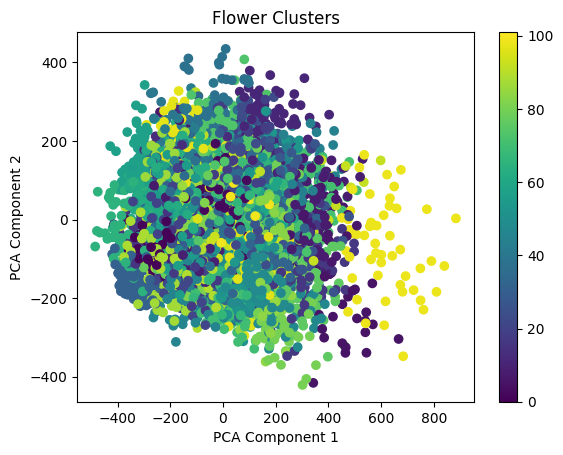

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.cpu().numpy())

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title("Flower Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

**Conclusion:**<br>  
